#DATA VISUALIZATION FOR IRIS SPECIES

In [1]:
import numpy as np 
import pandas as pd 

import warnings # current version of seaborn generates a bunch of warnings that will be ignored
warnings.filterwarnings('ignore')

# Data Visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [6]:
iris = pd.read_csv('/Iris.csv')

In [7]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


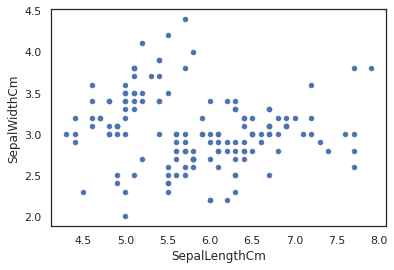

In [11]:
iris.plot(kind = 'scatter',x = 'SepalLengthCm', y = 'SepalWidthCm')

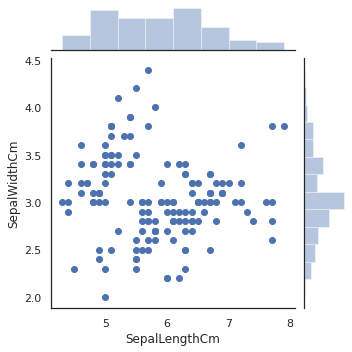

In [12]:
sns.jointplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data=iris, size = 5)

In [13]:
iris.shape

(150, 6)

In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


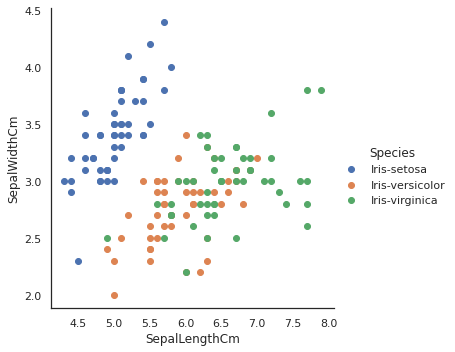

In [16]:
#Using FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue = 'Species', size = 5) \
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
    .add_legend()

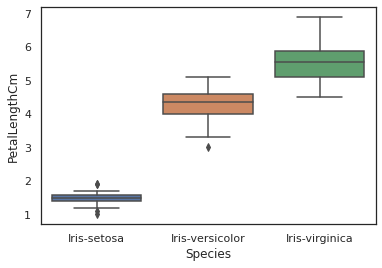

In [17]:
#Using boxplot to look at the individual features
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

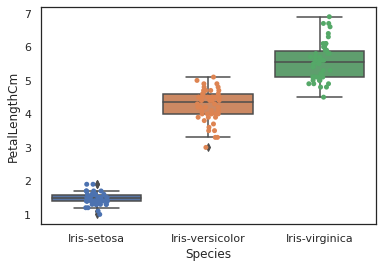

In [20]:
#Extending this plot is adding a layer of individual points on top of it through Seaborn's striplot.
#Using jitter=True so that all the points don't fall in single vertical lines above the species.

ax = sns.boxplot(data=iris, x = 'Species',y = 'PetalLengthCm')
ax = sns.stripplot(data=iris, x='Species', y='PetalLengthCm', jitter=True, edgecolor='green')

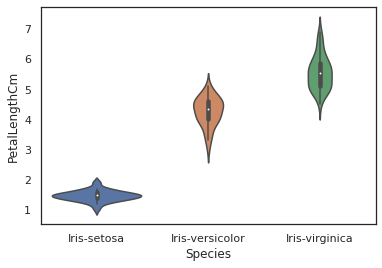

In [21]:
#Using violin plot to combine the benefits of the previous two plots and simplify them.

sns.violinplot(x='Species',y='PetalLengthCm', data=iris, size=6)


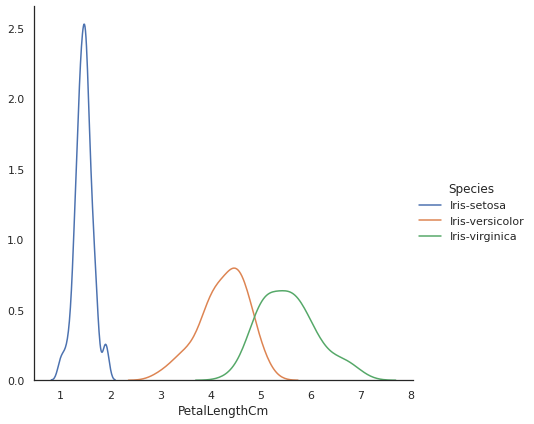

In [22]:
#kdeplot creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

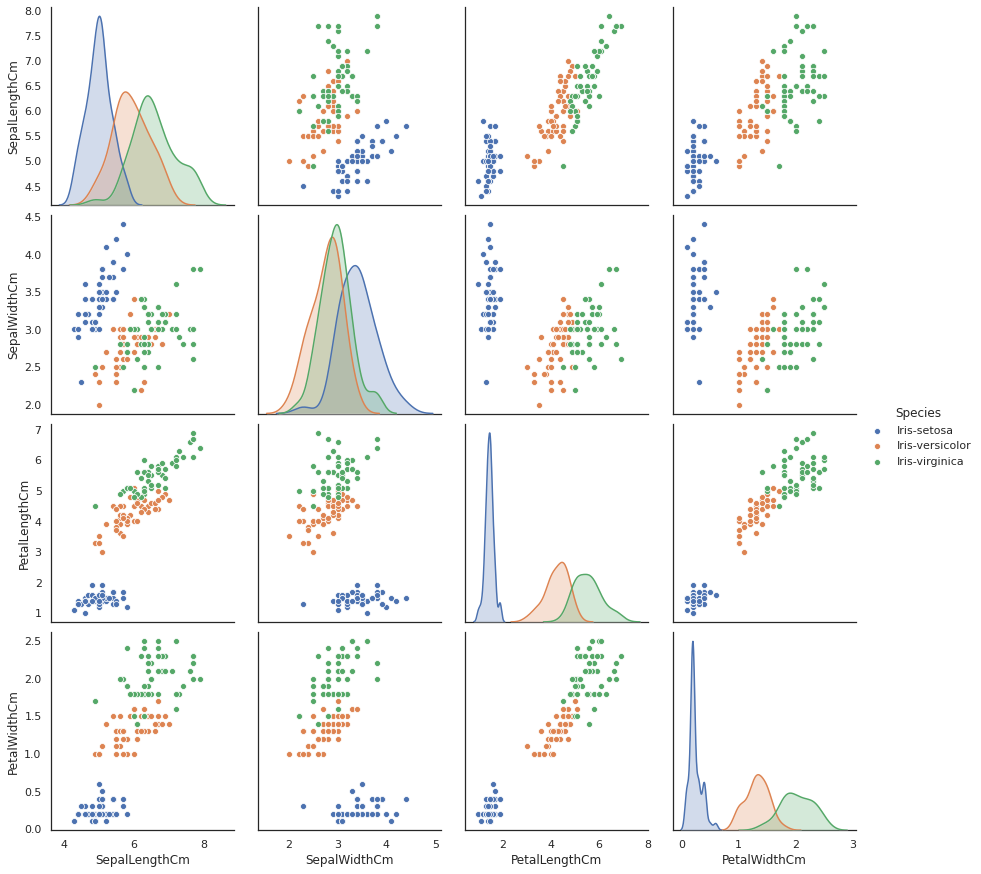

In [23]:
#pairplot shows the bivariate relation between each pair of features
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3)

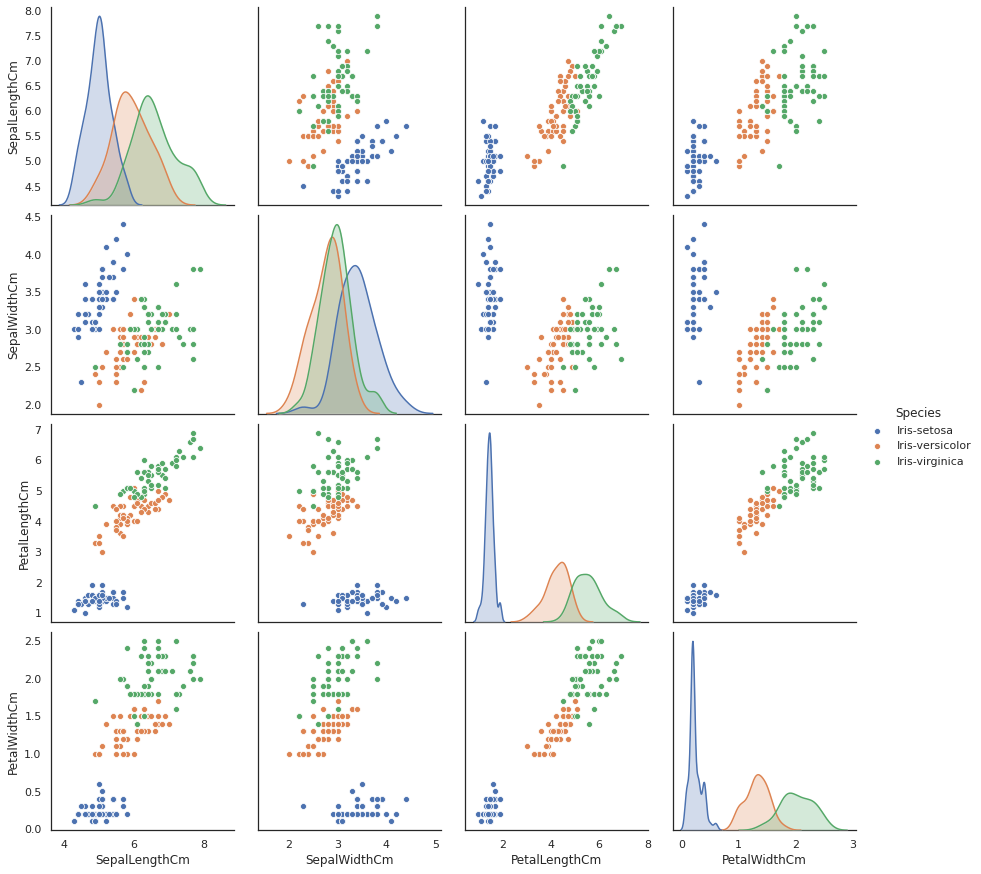

In [24]:
# The diagonal elements in a pairplot show the histogram by default. We update these elements to show kde.

sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3, diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e3254fc50>,
      dtype=object)

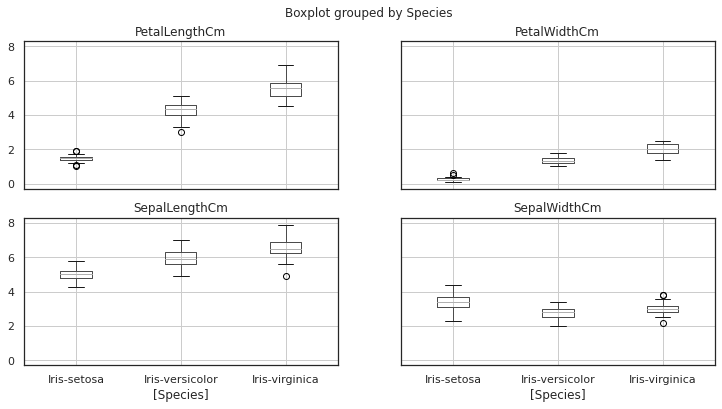

In [25]:
# Boxplot with Pandas on each feature split out by species

iris.drop('Id', axis=1).boxplot(by='Species', figsize=(12,6))

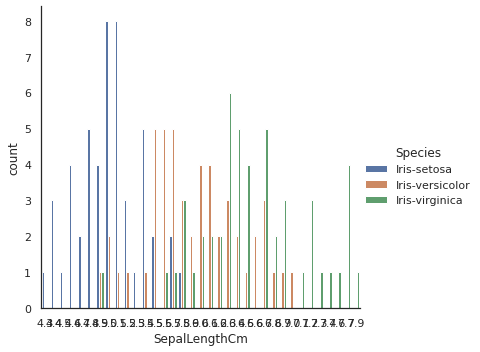

In [27]:
sns.factorplot('SepalLengthCm', data=iris, hue='Species', kind='count' )